**Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, stats
from math import sqrt
from numpy import mean, var

**Reading the data as a data frame**

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [5]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Shape of the data

In [6]:
df.shape

(1338, 7)

Data type of each attribute

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking the presence of missing values

In [8]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

5 point summary of numerical attributes

In [10]:
# 5-number summary

from numpy import percentile

# quartiles

New_df = df.loc[:,['age']]

quartiles = percentile(New_df, [25, 50, 75])

# calculate min/max

df_min , df_max = New_df.min(), New_df.max()

# Printing 5-numbers summary

print('Min:\n', df_min)
print('....'*10)
print('Q1: \n', quartiles[0])
print('Median: \n', quartiles[1])
print('Q3: \n', quartiles[2])
print('....'*10)
print('Max: \n', df_max)

Min:
 age    18
dtype: int64
........................................
Q1: 
 27.0
Median: 
 39.0
Q3: 
 51.0
........................................
Max: 
 age    64
dtype: int64


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of 'bmi', 'age' and 'charges' columns

In [12]:
# Selecting 'bmi', 'age' and 'charges' columns

Dist_df = df.loc[:, ['bmi', 'age', 'charges']]
Dist_df.head()

,bmi,age,charges
0,27.900,19,16884.92400
1,33.770,18,1725.55230
2,33.000,28,4449.46200
3,22.705,33,21984.47061
4,28.880,32,3866.85520


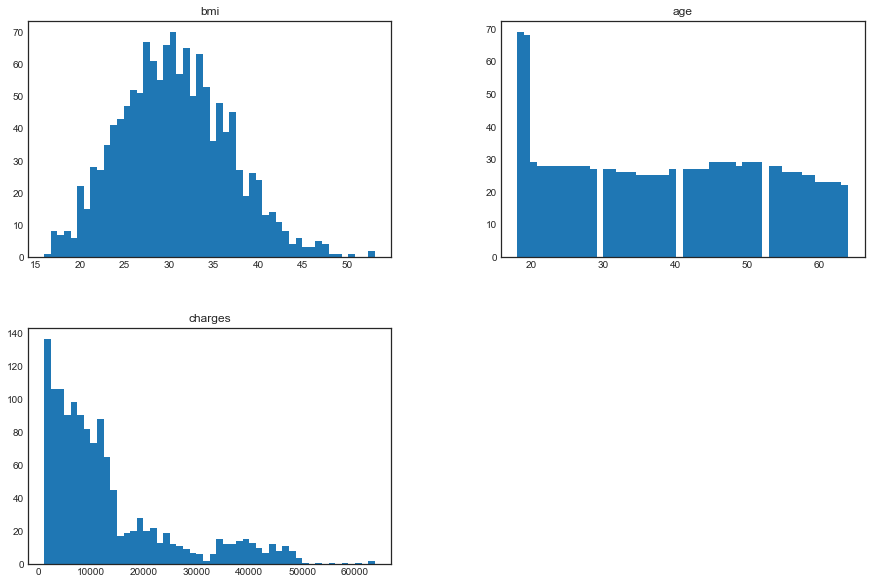

In [13]:
# Histogram of selected columns

plt.style.use('seaborn-white')
Dist_df.hist(bins=50, figsize=(15,10), grid=False)
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

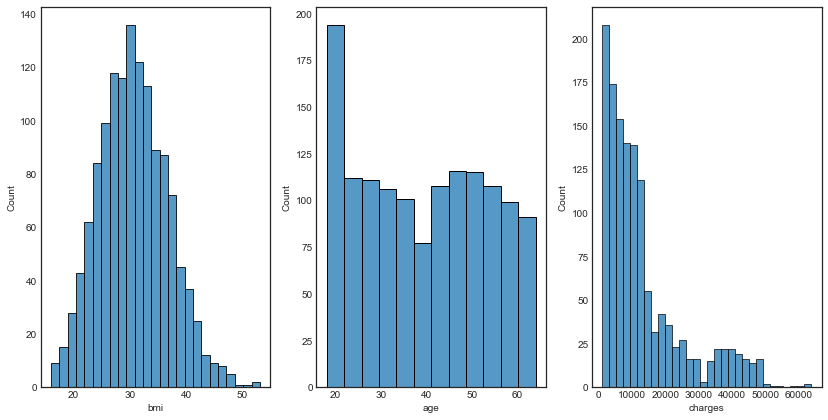

In [14]:
# For better visualization

fig, axs = plt.subplots(1, 3, figsize=(14, 7))

sns.histplot(Dist_df['bmi'], ax=axs[0])
sns.histplot(Dist_df['age'], ax=axs[1])
sns.histplot(Dist_df['charges'], ax=axs[2])



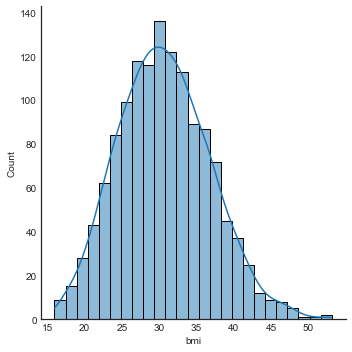

In [15]:
sns.displot(Dist_df['bmi'], kde=True)

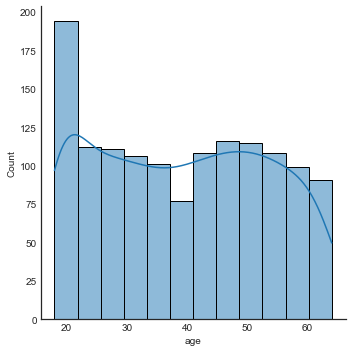

In [16]:
sns.displot(Dist_df['age'], kde=True)

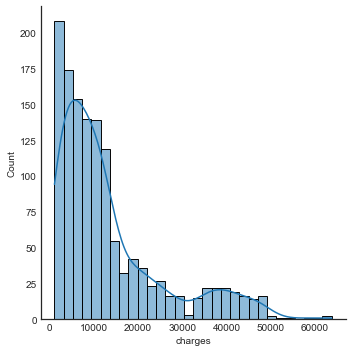

In [17]:
sns.displot(Dist_df['charges'], kde=True)

Measure of skewness of 'bmi', 'age' and 'charges' columns

In [18]:
# 'bmi' skewness

skew(Dist_df['bmi'])

0.28372857291709386

In [19]:
# 'age' skewness
# Important to note that 'age' isn't unimodal distributed

skew(Dist_df['age'])

0.055610083072599126

In [20]:
# 'charges' skewness

skew(Dist_df['charges'])

1.5141797118745743

Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [21]:
X=Dist_df['bmi'].values
X

array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07])

<AxesSubplot:>

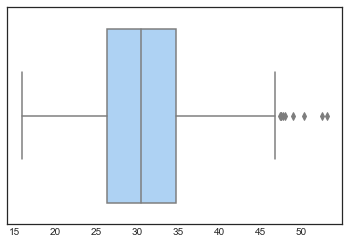

In [22]:
# we can see some outliers in the 'bmi' dataset
sns.boxplot(data=Dist_df['bmi'], x=X, color='#a2d2ff')

In [23]:
X=Dist_df['age'].values
X

array([19, 18, 28, ..., 18, 21, 61], dtype=int64)

<AxesSubplot:xlabel='age'>

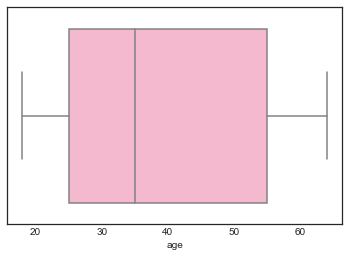

In [24]:
# Looks like we don't have outliers in the 'age' dataset
sns.boxplot(data=Dist_df['age'], x=X, color='#ffafcc')

In [25]:
X=Dist_df['charges'].values
X

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

<AxesSubplot:>

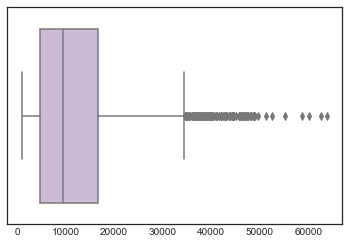

In [26]:
# Apparently we have a lot of outliers in the 'charges' dataset

sns.boxplot(data=Dist_df['charges'], x=X, color='#cdb4db')

Distribution of categorical columns (include children)

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [28]:
cat_cols = df[['sex', 'children', 'smoker', 'region']]
cat_cols

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


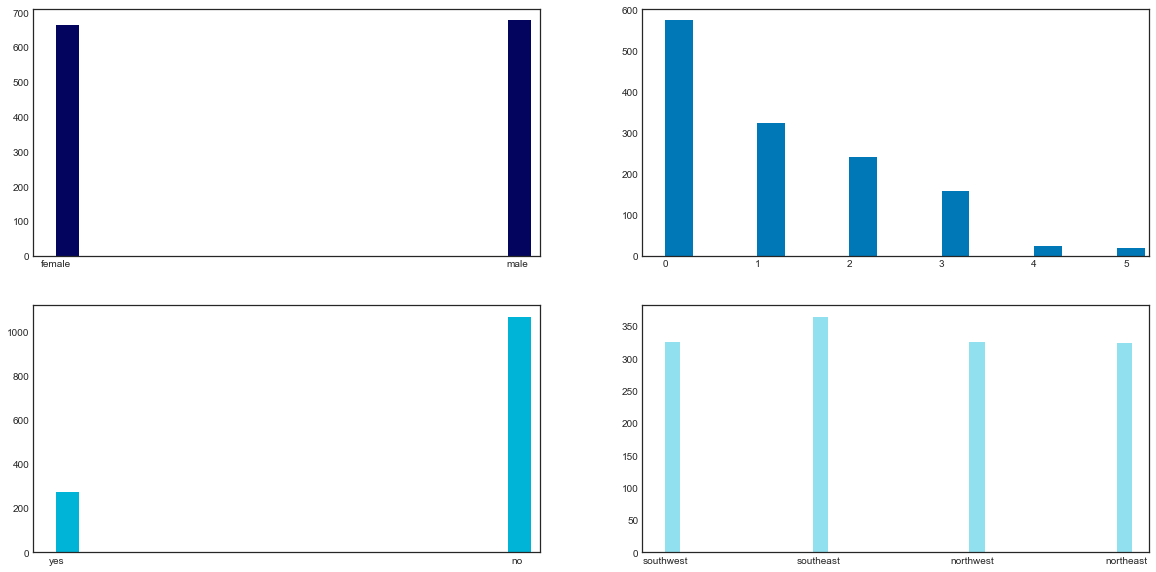

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

cat_cols['sex'].hist(bins=50, grid=False, ax=axs[0,0], color='#03045e', width=0.05)
cat_cols['children'].hist(bins=50, grid=False, ax=axs[0,1], color='#0077b6', width=0.3)
cat_cols['smoker'].hist(bins=50, grid=False, ax=axs[1,0], color='#00b4d8', width=0.05)
cat_cols['region'].hist(bins=50, grid=False, ax=axs[1,1], color='#90e0ef', width=0.1)
plt.show()

Pair plot that includes all the columns of the data frame

In [30]:
dummy_df = df.copy()

In [31]:
dummy_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [32]:
dummy_df['sex'].replace(['female', 'male'], [0,1], inplace=True)
dummy_df['smoker'].replace(['no', 'yes'], [0,1], inplace=True)
dummy_df['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'], [0,1,2,3], inplace=True)

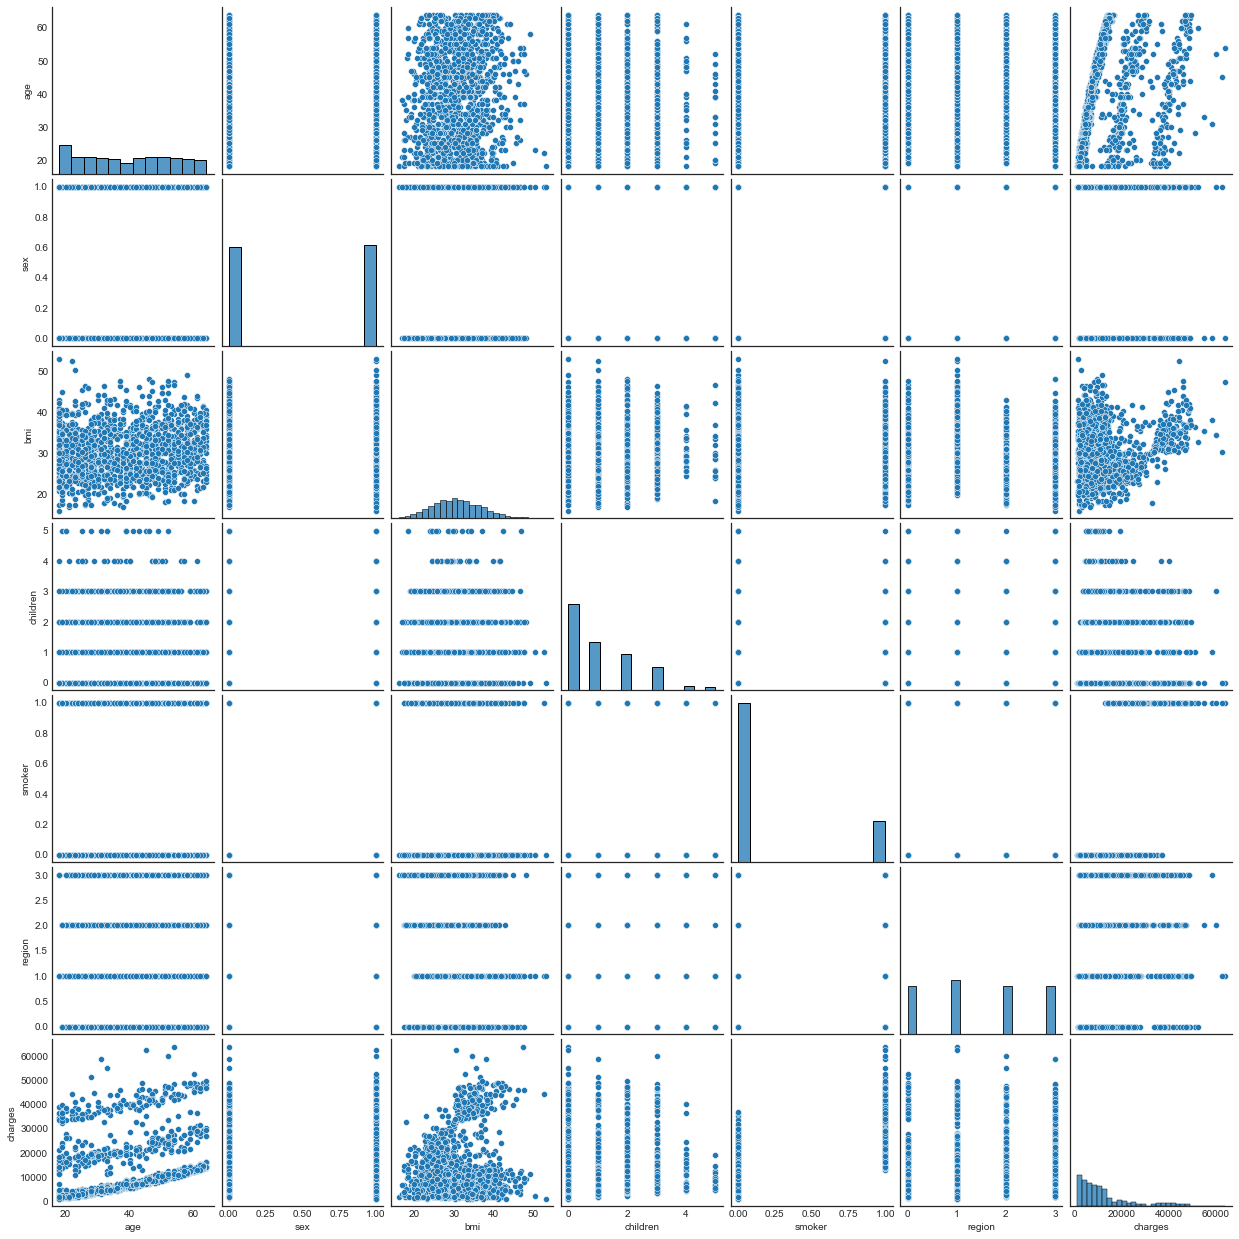

In [33]:
sns.pairplot(dummy_df)

Do charges of people who smoke differ significantly from the people who don't?

Does bmi of males differ significantly from that of females?

Is the proportion of smokers significantly different in different genders?

In [34]:
smk_gen = df[['smoker', 'sex']]
smk_gen

,smoker,sex
0,yes,female
1,no,male
2,no,male
3,no,male
4,no,male
...,...,...
1333,no,male
1334,no,female
1335,no,female
1336,no,female


In [35]:
# Female

fem = smk_gen['smoker'][smk_gen['sex']=='female']
fem

0       yes
5        no
6        no
7        no
9        no
       ... 
1332     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 662, dtype: object

In [36]:
fem.value_counts()

no     547
yes    115
Name: smoker, dtype: int64

In [37]:
# Male

male = smk_gen['smoker'][smk_gen['sex']=='male']
male

1       no
2       no
3       no
4       no
8       no
        ..
1324    no
1325    no
1327    no
1329    no
1333    no
Name: smoker, Length: 676, dtype: object

In [38]:
male.value_counts()

no     517
yes    159
Name: smoker, dtype: int64

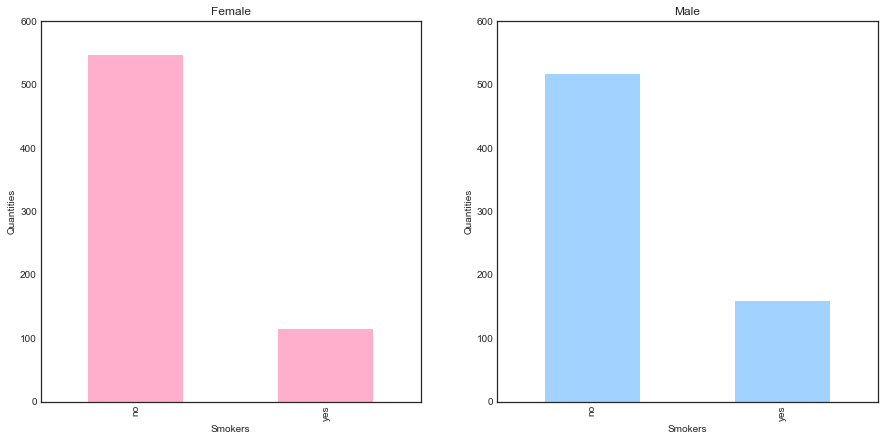

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

fem.value_counts().plot(kind='bar',
                        ax=axs[0],
                        color='#ffafcc',
                        ylim=(0,600),
                        title='Female',
                        xlabel='Smokers',
                        ylabel='Quantities')

male.value_counts().plot(kind='bar',
                         ax=axs[1],
                         color='#a2d2ff',
                         ylim=(0,600),
                         title='Male',
                         xlabel='Smokers',
                         ylabel='Quantities')
plt.show()

In [40]:
# table

test = pd.DataFrame({'Female': fem.value_counts(),
                     'Male': male.value_counts()})




In [41]:
df_smk = test.T
df_smk

,no,yes
Female,547,115
Male,517,159


In [42]:
df_smk_total = df_smk.copy()

In [43]:
df_smk_total.loc['Column_Total']= df_smk_total.sum(numeric_only=True, axis=0)
df_smk_total.loc[:,'Row_Total'] = df_smk_total.sum(numeric_only=True, axis=1)

In [44]:
df_smk_total

,no,yes,Row_Total
Female,547,115,662
Male,517,159,676
Column_Total,1064,274,1338


In [47]:
# chi-squared test
# return the 'chi-squared stats', 'p-valor', and degrees of freedom

# h0: There is no statistical difference between smokers by gender
# h1: There is statistical difference between the two groups

from scipy.stats import chi2_contingency

chi2_contingency(df_smk)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

With p-value less than 0.05 (p-value: 0.0065) we can reject the null hypothesis and assume that there is difference between genders

In [ ]:
# Number of no smokers of each genre

no_smk = smk_gen[smk_gen['smoker']=='yes']

In [ ]:
no_smk.value_counts()

In [ ]:
no_smk.value_counts().plot(kind='bar')

In [ ]:
# Number of smokers of each genre

smk = smk_gen[smk_gen['smoker']=='yes']

In [ ]:
smk.value_counts()

In [ ]:
smk.value_counts().plot(kind='bar')

In [ ]:
#test

Is the distribution of bmi across women with no children, one child and two children, the same?